In [1]:
import pandas as pd
from utils import config, database_service
#import snowflake.connector
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
from datetime import date
pd.set_option('display.width', 600)
pd.set_option('display.max_columns', 300)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import Image
import json
import statsmodels.api as sm
from statsmodels.stats import contingency_tables
import scipy.stats as stats
from sklearn.metrics import roc_curve, auc
from scipy.stats import multivariate_normal
import scipy.stats as stats
from scipy.stats import chi2
from sklearn.preprocessing import LabelEncoder
from sqlalchemy import create_engine
import pandas as pd
from sqlalchemy import create_engine
from snowflake.sqlalchemy import URL
import snowflake.connector
snowflake_cfg = config.get_config()['snowflake']
snowflake_db = snowflake.connector.connect(
    user=snowflake_cfg['username'],
    password=snowflake_cfg['password'],
    account=snowflake_cfg['host']
)
snowflake_db.cursor().execute('USE WAREHOUSE DATA_SCIENCE');

/Users/venmani/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import os
import pandas as pd

# Define the folder containing the CSV files
folder_path = "Pilot run data/"

# Initialize an empty list to hold DataFrames
dataframes = []

# Iterate through all files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):  # Check if the file is a CSV
        # Extract the identifier from the file name
        identifier = file_name.split(" - ")[0]
        identifier = identifier.split("_")[0]
        
        # Load the CSV file into a DataFrame
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        
        # Add a new column for the identifier
        df["APPLICATION_CODE"] = identifier
        
        # Append the DataFrame to the list
        dataframes.append(df)

# Combine all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Display the first few rows of the combined DataFrame
print(combined_df.head())

         .requestId  .data.phone.basic.phoneNumber  .data.phone.basic.phoneValid .data.phone.basic.phoneType  .data.phone.basic.phoneDisposable .data.phone.basic.active  .data.phone.basic.activationDate  .data.phone.basic.activeSinceXDays  .data.phone.basic.simType  .data.phone.basic.phoneNumberAge  .data.phone.basic.phoneNumberAgeDescription  .data.phone.basic.phoneTenure .data.phone.basic.country .data.phone.basic.originalCarrier .data.phone.basic.ported  .data.phone.basic.portedHistory.portedDate  .data.phone.basic.portedHistory.numberOfPorts  \
0  bgc1_gEvSQ0EJ6A=                60129493500.000                          True                      MOBILE                              False                      YES                               NaN                                 NaN                        NaN                               NaN                                          NaN                            NaN                        MY           MAXIS BROADBAND SDN BHD          

In [4]:
combined_df['phone_active'] = (combined_df['.data.phone.basic.active']=='YES').astype(int)
combined_df.groupby(['.data.phone.basic.originalCarrier']).agg({'phone_active':'mean','APPLICATION_CODE':'count'}).reset_index().sort_values(by='APPLICATION_CODE', ascending=False)

,.data.phone.basic.originalCarrier,phone_active,APPLICATION_CODE
2,MAXIS BROADBAND SDN BHD,0.528,180
1,DIGI TELECOMMUNICATIONS SDN BHD,0.785,121
0,CELCOM AXIATA BERHAD,1.000,99
5,U MOBILE SDN BHD,0.957,46
6,WEBE DIGITAL SDN BHD (TM),0.167,6
3,RED ONE NETWORK SDN BHD,1.000,4
4,TUNE TALK SDN BHD,1.000,4
7,XOX COM SDN BHD,1.000,4


In [5]:
combined_df.groupby(['.data.phone.basic.portedHistory.currentCarrierCircle']).agg({'phone_active':'mean','APPLICATION_CODE':'count'}).reset_index().sort_values(by='APPLICATION_CODE', ascending=False)

,.data.phone.basic.portedHistory.currentCarrierCircle,phone_active,APPLICATION_CODE
2,Maxis Maxis Communications Berhad,0.339,168
1,DiGi DiGi Telecommunications,0.973,112
0,Celcom Celcom Axiata Berhad,1.000,104
4,U Mobile U Mobile Sdn Bhd,0.939,66
5,XOX COM SDN BHD,1.000,7
3,Tune Talk Tune Talk Sdn Bhd,1.000,3
7,unifi Webe Digital Sdn Bhd,1.000,3
6,Yes YTL Communications Sdn Bhd,1.000,1


In [6]:
combined_df.groupby(['.data.phone.basic.currentNetwork.networkName']).agg({'phone_active':'mean','APPLICATION_CODE':'count'}).reset_index().sort_values(by='APPLICATION_CODE', ascending=False).reset_index().to_csv("phone_carriers_digital_footprint.csv", index=False)

In [7]:
combined_df.groupby(['.data.phone.basic.portedHistory.currentCarrierCircle']).agg({'phone_active':'mean','APPLICATION_CODE':'count'}).reset_index().sort_values(by='APPLICATION_CODE', ascending=False).reset_index()

,index,.data.phone.basic.portedHistory.currentCarrierCircle,phone_active,APPLICATION_CODE
0,2,Maxis Maxis Communications Berhad,0.339,168
1,1,DiGi DiGi Telecommunications,0.973,112
2,0,Celcom Celcom Axiata Berhad,1.000,104
3,4,U Mobile U Mobile Sdn Bhd,0.939,66
4,5,XOX COM SDN BHD,1.000,7
5,3,Tune Talk Tune Talk Sdn Bhd,1.000,3
6,7,unifi Webe Digital Sdn Bhd,1.000,3
7,6,Yes YTL Communications Sdn Bhd,1.000,1


In [8]:
combined_df['APPLICATION_CODE'].value_counts()

APPLICATION_CODE
APPMY0824-0229    2
APPMY0724-8955    1
APPMY0724-8901    1
APPMY0824-9962    1
APPMY0824-0830    1
                 ..
APPMY0724-9010    1
APPMY0724-9515    1
APPMY0724-8697    1
APPMY0724-8493    1
APPMY0724-9147    1
Name: count, Length: 464, dtype: int64

In [9]:
pipe = pd.read_sql("""select deal_lost_reason, application_code
from cdm.transaction.my_pipedrive_deals_t where application_code is not NULL;
""", con=snowflake_db)

In [10]:
#combined_df = combined_df.merge(pipe, on='APPLICATION_CODE', how='left')

In [11]:
#combined_df['DEAL_LOST_REASON'].value_counts()

In [12]:
original = pd.read_sql("""select a.cmd_ctr_loan_id, a.cmd_ctr_borrower_id,LOAN_ORIGINATION_LCL_AMT,
loan_max_dpd_lcl_days, loan_created_at_lcl_ts, a.loan_code, application_code, CHANNEL_LEVEL_3_NAME,
 a.BORROWER_EMAIL_ADDRESS, 
 c.BORROWER_MOBILE_PHONE_NMBR_CLEAN,  
 c.BORROWER_PHONE_NMBR_CLEAN,
 loan_max_dpd_unpaid_lcl_days
from adm.transaction.loan_denorm_t a
left join cdm.transaction.my_pipedrive_deals_t b on a.loan_code = b.loan_code and b.PIPEDRIVE_STATUS_NAME='won'
left join adm.counterparty.borrower_denorm_t c on a.dwh_borrower_id = c.dwh_borrower_id
where a.cmd_ctr_adjusted_product_id in (25, 195, 235)
and a.loan_stage_id = 5""", con=snowflake_db)

In [13]:
m = pd.read_sql("""WITH RankedLoans AS (
    SELECT 
        *,
        ROW_NUMBER() OVER (PARTITION BY loan_code ORDER BY installment_payment_deadline_lcl_ts) AS rn
    FROM 
        adm.transaction.installment_denorm_t
        WHERE CMD_CTR_ADJUSTED_PRODUCT_ID IN (25, 195, 235) AND LOAN_STAGE_ID = 5
)
SELECT 
    loan_code, max(dpd_lcl_days) as max_dpd_1
FROM 
    RankedLoans
WHERE 
    rn <= 1
    group by loan_code""", con=snowflake_db)

In [14]:
original = original.merge(m, on='LOAN_CODE', how='left')

In [15]:
original['dpd7_1'] = (original['MAX_DPD_1']>7).astype(int)
original['dpd30_1'] = (original['MAX_DPD_1']>30).astype(int)

In [16]:
print(len(original), sum(original['dpd30_1']))

9626 350


In [17]:
original

,CMD_CTR_LOAN_ID,CMD_CTR_BORROWER_ID,LOAN_ORIGINATION_LCL_AMT,LOAN_MAX_DPD_LCL_DAYS,LOAN_CREATED_AT_LCL_TS,LOAN_CODE,APPLICATION_CODE,CHANNEL_LEVEL_3_NAME,BORROWER_EMAIL_ADDRESS,BORROWER_MOBILE_PHONE_NMBR_CLEAN,BORROWER_PHONE_NMBR_CLEAN,LOAN_MAX_DPD_UNPAID_LCL_DAYS,MAX_DPD_1,dpd7_1,dpd30_1
0,3159285,1712695,99000.000,3,2024-01-26 00:30:16.453629+00:00,MBIBMY-2401000534,APPMY0124-0321,Online_Paid_Facebook,syazwan@azimuth.com.my,+60127065283,+60127065283,NaN,0,0,0
1,3070072,1559388,10000.000,6,2022-10-26 05:57:09.844889+00:00,MBBMY-2211000130,None,FS Website,ratinijeffry07@gmail.com,+60164067472,+60164067472,NaN,0,0,0
2,3140468,1287557,4400.000,39,2023-09-06 14:28:55.445495+00:00,MBBMY-2309000070,None,FS Website,maggie_mh06@hotmail.com,+60168081484,+60168081484,-12.000,37,1,1
3,3142729,1609886,11000.000,7,2023-09-22 07:39:34.870178+00:00,MBIBMY-2309000797,None,FS Website,benfauzee@gmail.com,+60122468793,+60122468793,-5.000,0,0,0
4,2703910,1320560,25000.000,6,2021-09-28 02:45:51.109503+00:00,MBBMY-2109000250,None,FS Website,nzarifgemilang@gmail.com,+60194564234,+60194564234,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9621,3170843,1695795,11000.000,17,2024-05-20 08:11:37.777358+00:00,MBBMY-2405000063,None,None,dilla_2506@yahoo.com.my,+60173607057,+60173607057,2.000,3,0,0
9622,3177057,1454133,11000.000,1,2024-07-18 06:33:36.390632+00:00,MBIBMY-2407000149,None,None,khaijoy8787@gmail.com,+60162434156,+60162434156,-19.000,0,0,0
9623,2203276,1135516,25000.000,26,2020-03-10 03:10:09.861996+00:00,MBBMY-2003000046,None,None,lohpehchu@gmail.com,+60164200522,+60164200522,NaN,0,0,0
9624,1730801,1100152,40000.000,2,2019-12-10 09:45:55.087362+00:00,MBBMY-1912000037,None,None,sabilah@reti.edu.my,+60199833160,+60199833160,NaN,0,0,0


In [18]:
original = original[original['LOAN_CREATED_AT_LCL_TS']>='2024-01-01']

In [19]:
original = original.merge(combined_df, on='APPLICATION_CODE', how='left')

In [20]:
original.isna().sum()

CMD_CTR_LOAN_ID                                            0
CMD_CTR_BORROWER_ID                                        0
LOAN_ORIGINATION_LCL_AMT                                   0
LOAN_MAX_DPD_LCL_DAYS                                      0
LOAN_CREATED_AT_LCL_TS                                     0
                                                        ... 
.data.phone.social.profiles.messaging.viber.lastSeen    2838
.data.phone.social.profiles.messaging.viber.name        2838
.data.phone.basic.portedHistory                         2838
.data.phone.basic.currentNetwork                        2838
phone_active                                            2549
Length: 303, dtype: int64

In [21]:
original = original.dropna(subset=['.data.phone.basic.phoneNumber'])
original

,CMD_CTR_LOAN_ID,CMD_CTR_BORROWER_ID,LOAN_ORIGINATION_LCL_AMT,LOAN_MAX_DPD_LCL_DAYS,LOAN_CREATED_AT_LCL_TS,LOAN_CODE,APPLICATION_CODE,CHANNEL_LEVEL_3_NAME,BORROWER_EMAIL_ADDRESS,BORROWER_MOBILE_PHONE_NMBR_CLEAN,BORROWER_PHONE_NMBR_CLEAN,LOAN_MAX_DPD_UNPAID_LCL_DAYS,MAX_DPD_1,dpd7_1,dpd30_1,.requestId,.data.phone.basic.phoneNumber,.data.phone.basic.phoneValid,.data.phone.basic.phoneType,.data.phone.basic.phoneDisposable,.data.phone.basic.active,.data.phone.basic.activationDate,.data.phone.basic.activeSinceXDays,.data.phone.basic.simType,.data.phone.basic.phoneNumberAge,.data.phone.basic.phoneNumberAgeDescription,.data.phone.basic.phoneTenure,.data.phone.basic.country,.data.phone.basic.originalCarrier,.data.phone.basic.ported,.data.phone.basic.portedHistory.portedDate,.data.phone.basic.portedHistory.numberOfPorts,.data.phone.basic.portedHistory.portedSinceXDays,.data.phone.basic.portedHistory.currentCarrierCircle,.data.phone.basic.portedHistory.originalCarrierCircle,.data.phone.basic.portedHistory.changeInCarrierRegion,.data.phone.basic.portedHistory.portedEvents,.data.phone.basic.currentNetwork.localRoutingNumber,.data.phone.basic.currentNetwork.mobileCountryCode,.data.phone.basic.currentNetwork.mobileNetworkCode,.data.phone.basic.currentNetwork.networkName,.data.phone.basic.currentNetwork.serviceProfileId,.data.phone.basic.numberRecycled,.data.phone.basic.lastDeactivated,.data.phone.basic.isSpam,.data.phone.basic.topUpHistory,.data.phone.basic.simSwap,.data.phone.social.summary.registeredProfiles,.data.phone.social.summary.registeredEmailProviderProfiles,.data.phone.social.summary.registeredEcommerceProfiles,.data.phone.social.summary.registeredSocialMediaProfiles,.data.phone.social.summary.registeredProfessionalProfiles,.data.phone.social.summary.registeredMessagingProfiles,.data.phone.social.summary.lastActivity,.data.phone.social.summary.numberOfNamesReturned,.data.phone.social.summary.numberOfPhotosReturned,.data.phone.social.profiles.emailProvider.google.registered,.data.phone.social.profiles.emailProvider.google.accountId,.data.phone.social.profiles.emailProvider.google.name,.data.phone.social.profiles.ecommerce.bukalapak.registered,.data.phone.social.profiles.ecommerce.amazon.registered,.data.phone.social.profiles.socialMedia.facebook.registered,.data.phone.social.profiles.socialMedia.twitter.registered,.data.phone.social.profiles.socialMedia.instagram.registered,.data.phone.social.profiles.professional.microsoft.registered,.data.phone.social.profiles.professional.linkedin.registered,.data.phone.social.profiles.messaging.telegram.registered,.data.phone.social.profiles.messaging.telegram.photo,.data.phone.social.profiles.messaging.telegram.privacyStatus,.data.phone.social.profiles.messaging.telegram.lastSeen,.data.phone.social.profiles.messaging.whatsapp.registered,.data.phone.social.profiles.messaging.whatsapp.photo,.data.phone.social.profiles.messaging.whatsapp.privacyStatus,.data.phone.social.profiles.messaging.whatsapp.lastSeen,.data.phone.social.profiles.messaging.whatsapp.about,.data.phone.social.profiles.messaging.whatsapp.businessAccount,.data.phone.social.profiles.messaging.skype.registered,.data.phone.social.profiles.messaging.skype.language,.data.phone.social.profiles.messaging.skype.id,.data.phone.social.profiles.messaging.skype.handle,.data.phone.social.profiles.messaging.skype.bio,.data.phone.social.profiles.messaging.skype.name,.data.phone.social.profiles.messaging.skype.age,.data.phone.social.profiles.messaging.skype.gender,.data.phone.social.profiles.messaging.skype.photo,.data.phone.social.profiles.messaging.skype.city,.data.phone.social.profiles.messaging.skype.state,.data.phone.social.profiles.messaging.skype.country,.data.phone.identity,.data.phone.breach,.data.email.social.summary.registeredProfiles,.data.email.social.summary.registeredConsumerElectronicsProfiles,.data.email.social.summary.registeredEmailProviderProfiles,.data.email.social.summary.registeredEcommerceProfiles,.data.email.social.summa

In [22]:
original['dpd7'] = (original['LOAN_MAX_DPD_LCL_DAYS']>7).astype(int)
original['dpd30'] = (original['LOAN_MAX_DPD_LCL_DAYS']>30).astype(int)

In [23]:
print(len(original), sum(original['dpd7']), sum(original['dpd30']))
print(len(original), sum(original['dpd7_1']), sum(original['dpd30_1']))
print(len(original),original['dpd7'].mean(), original['dpd30'].mean())

289 81 40
289 31 17
289 0.28027681660899656 0.1384083044982699


In [24]:
a1 = original[original['.data.phone.basic.portedHistory.currentCarrierCircle']!='Maxis Maxis Communications Berhad']
a1.groupby(['.data.phone.basic.portedHistory.currentCarrierCircle']).agg({'phone_active':'mean','APPLICATION_CODE':'count'}).reset_index().sort_values(by='APPLICATION_CODE', ascending=False).reset_index()

,index,.data.phone.basic.portedHistory.currentCarrierCircle,phone_active,APPLICATION_CODE
0,0,Celcom Celcom Axiata Berhad,1.000,78
1,1,DiGi DiGi Telecommunications,0.984,63
2,3,U Mobile U Mobile Sdn Bhd,0.956,45
3,4,XOX COM SDN BHD,1.000,4
4,2,Tune Talk Tune Talk Sdn Bhd,1.000,3
5,5,unifi Webe Digital Sdn Bhd,1.000,3


In [25]:
original[original['.data.phone.social.profiles.messaging.whatsapp.registered'].isna()]

,CMD_CTR_LOAN_ID,CMD_CTR_BORROWER_ID,LOAN_ORIGINATION_LCL_AMT,LOAN_MAX_DPD_LCL_DAYS,LOAN_CREATED_AT_LCL_TS,LOAN_CODE,APPLICATION_CODE,CHANNEL_LEVEL_3_NAME,BORROWER_EMAIL_ADDRESS,BORROWER_MOBILE_PHONE_NMBR_CLEAN,BORROWER_PHONE_NMBR_CLEAN,LOAN_MAX_DPD_UNPAID_LCL_DAYS,MAX_DPD_1,dpd7_1,dpd30_1,.requestId,.data.phone.basic.phoneNumber,.data.phone.basic.phoneValid,.data.phone.basic.phoneType,.data.phone.basic.phoneDisposable,.data.phone.basic.active,.data.phone.basic.activationDate,.data.phone.basic.activeSinceXDays,.data.phone.basic.simType,.data.phone.basic.phoneNumberAge,.data.phone.basic.phoneNumberAgeDescription,.data.phone.basic.phoneTenure,.data.phone.basic.country,.data.phone.basic.originalCarrier,.data.phone.basic.ported,.data.phone.basic.portedHistory.portedDate,.data.phone.basic.portedHistory.numberOfPorts,.data.phone.basic.portedHistory.portedSinceXDays,.data.phone.basic.portedHistory.currentCarrierCircle,.data.phone.basic.portedHistory.originalCarrierCircle,.data.phone.basic.portedHistory.changeInCarrierRegion,.data.phone.basic.portedHistory.portedEvents,.data.phone.basic.currentNetwork.localRoutingNumber,.data.phone.basic.currentNetwork.mobileCountryCode,.data.phone.basic.currentNetwork.mobileNetworkCode,.data.phone.basic.currentNetwork.networkName,.data.phone.basic.currentNetwork.serviceProfileId,.data.phone.basic.numberRecycled,.data.phone.basic.lastDeactivated,.data.phone.basic.isSpam,.data.phone.basic.topUpHistory,.data.phone.basic.simSwap,.data.phone.social.summary.registeredProfiles,.data.phone.social.summary.registeredEmailProviderProfiles,.data.phone.social.summary.registeredEcommerceProfiles,.data.phone.social.summary.registeredSocialMediaProfiles,.data.phone.social.summary.registeredProfessionalProfiles,.data.phone.social.summary.registeredMessagingProfiles,.data.phone.social.summary.lastActivity,.data.phone.social.summary.numberOfNamesReturned,.data.phone.social.summary.numberOfPhotosReturned,.data.phone.social.profiles.emailProvider.google.registered,.data.phone.social.profiles.emailProvider.google.accountId,.data.phone.social.profiles.emailProvider.google.name,.data.phone.social.profiles.ecommerce.bukalapak.registered,.data.phone.social.profiles.ecommerce.amazon.registered,.data.phone.social.profiles.socialMedia.facebook.registered,.data.phone.social.profiles.socialMedia.twitter.registered,.data.phone.social.profiles.socialMedia.instagram.registered,.data.phone.social.profiles.professional.microsoft.registered,.data.phone.social.profiles.professional.linkedin.registered,.data.phone.social.profiles.messaging.telegram.registered,.data.phone.social.profiles.messaging.telegram.photo,.data.phone.social.profiles.messaging.telegram.privacyStatus,.data.phone.social.profiles.messaging.telegram.lastSeen,.data.phone.social.profiles.messaging.whatsapp.registered,.data.phone.social.profiles.messaging.whatsapp.photo,.data.phone.social.profiles.messaging.whatsapp.privacyStatus,.data.phone.social.profiles.messaging.whatsapp.lastSeen,.data.phone.social.profiles.messaging.whatsapp.about,.data.phone.social.profiles.messaging.whatsapp.businessAccount,.data.phone.social.profiles.messaging.skype.registered,.data.phone.social.profiles.messaging.skype.language,.data.phone.social.profiles.messaging.skype.id,.data.phone.social.profiles.messaging.skype.handle,.data.phone.social.profiles.messaging.skype.bio,.data.phone.social.profiles.messaging.skype.name,.data.phone.social.profiles.messaging.skype.age,.data.phone.social.profiles.messaging.skype.gender,.data.phone.social.profiles.messaging.skype.photo,.data.phone.social.profiles.messaging.skype.city,.data.phone.social.profiles.messaging.skype.state,.data.phone.social.profiles.messaging.skype.country,.data.phone.identity,.data.phone.breach,.data.email.social.summary.registeredProfiles,.data.email.social.summary.registeredConsumerElectronicsProfiles,.data.email.social.summary.registeredEmailProviderProfiles,.data.email.social.summary.registeredEcommerceProfiles,.data.email.social.summa

In [26]:
original.groupby(['.data.phone.basic.portedHistory.currentCarrierCircle']).agg({'phone_active':'mean','APPLICATION_CODE':'count','.data.phone.basic.phoneNumber':'mean'}).reset_index().sort_values(by='APPLICATION_CODE', ascending=False).reset_index()


,index,.data.phone.basic.portedHistory.currentCarrierCircle,phone_active,APPLICATION_CODE,.data.phone.basic.phoneNumber
0,2,Maxis Maxis Communications Berhad,0.355,93,77594802343.720
1,0,Celcom Celcom Axiata Berhad,1.000,78,115648223038.731
2,1,DiGi DiGi Telecommunications,0.984,63,188955757786.333
3,4,U Mobile U Mobile Sdn Bhd,0.956,45,192395835580.822
4,5,XOX COM SDN BHD,1.000,4,60155277781.000
5,3,Tune Talk Tune Talk Sdn Bhd,1.000,3,240499833027.333
6,6,unifi Webe Digital Sdn Bhd,1.000,3,420793752927.667


In [27]:
original['.data.phone.basic.phoneTenure'].value_counts()

Series([], Name: count, dtype: int64)

In [28]:
original['LOAN_CREATED_AT_LCL_TS'].max()

Timestamp('2024-09-30 06:07:03.766133+0000', tz='UTC')

In [29]:
original['BORROWER_PHONE_NMBR_CLEAN'] = original['BORROWER_PHONE_NMBR_CLEAN'].replace("+","")
original['BORROWER_PHONE_NMBR_CLEAN'] = original['BORROWER_PHONE_NMBR_CLEAN'].astype(float)

In [30]:
original['.data.phone.basic.active']

2       YES
3       YES
6       YES
7        NO
15       NO
       ... 
2767    YES
2780    YES
2784     NO
2791    YES
2797    YES
Name: .data.phone.basic.active, Length: 289, dtype: object

In [31]:
original['.data.phone.social.summary.registeredSocialMediaProfiles'].value_counts()

.data.phone.social.summary.registeredSocialMediaProfiles
2.000    131
1.000     81
3.000     55
0.000     18
Name: count, dtype: int64

In [32]:
original.groupby('.data.phone.social.profiles.messaging.whatsapp.registered').agg({'dpd7_1':"mean"})

,dpd7_1
.data.phone.social.profiles.messaging.whatsapp.registered,
False,0.000
True,0.110


In [33]:
original['.data.phone.social.profiles.messaging.whatsapp.registered'].value_counts()

.data.phone.social.profiles.messaging.whatsapp.registered
True     281
False      2
Name: count, dtype: int64

In [34]:
original['.data.email.social.summary.registeredSocialMediaProfiles'].value_counts()

.data.email.social.summary.registeredSocialMediaProfiles
0.000    77
2.000    63
3.000    59
1.000    51
4.000    34
5.000     1
Name: count, dtype: int64

In [35]:
original[original['.data.phone.social.profiles.messaging.whatsapp.registered']==False]

,CMD_CTR_LOAN_ID,CMD_CTR_BORROWER_ID,LOAN_ORIGINATION_LCL_AMT,LOAN_MAX_DPD_LCL_DAYS,LOAN_CREATED_AT_LCL_TS,LOAN_CODE,APPLICATION_CODE,CHANNEL_LEVEL_3_NAME,BORROWER_EMAIL_ADDRESS,BORROWER_MOBILE_PHONE_NMBR_CLEAN,BORROWER_PHONE_NMBR_CLEAN,LOAN_MAX_DPD_UNPAID_LCL_DAYS,MAX_DPD_1,dpd7_1,dpd30_1,.requestId,.data.phone.basic.phoneNumber,.data.phone.basic.phoneValid,.data.phone.basic.phoneType,.data.phone.basic.phoneDisposable,.data.phone.basic.active,.data.phone.basic.activationDate,.data.phone.basic.activeSinceXDays,.data.phone.basic.simType,.data.phone.basic.phoneNumberAge,.data.phone.basic.phoneNumberAgeDescription,.data.phone.basic.phoneTenure,.data.phone.basic.country,.data.phone.basic.originalCarrier,.data.phone.basic.ported,.data.phone.basic.portedHistory.portedDate,.data.phone.basic.portedHistory.numberOfPorts,.data.phone.basic.portedHistory.portedSinceXDays,.data.phone.basic.portedHistory.currentCarrierCircle,.data.phone.basic.portedHistory.originalCarrierCircle,.data.phone.basic.portedHistory.changeInCarrierRegion,.data.phone.basic.portedHistory.portedEvents,.data.phone.basic.currentNetwork.localRoutingNumber,.data.phone.basic.currentNetwork.mobileCountryCode,.data.phone.basic.currentNetwork.mobileNetworkCode,.data.phone.basic.currentNetwork.networkName,.data.phone.basic.currentNetwork.serviceProfileId,.data.phone.basic.numberRecycled,.data.phone.basic.lastDeactivated,.data.phone.basic.isSpam,.data.phone.basic.topUpHistory,.data.phone.basic.simSwap,.data.phone.social.summary.registeredProfiles,.data.phone.social.summary.registeredEmailProviderProfiles,.data.phone.social.summary.registeredEcommerceProfiles,.data.phone.social.summary.registeredSocialMediaProfiles,.data.phone.social.summary.registeredProfessionalProfiles,.data.phone.social.summary.registeredMessagingProfiles,.data.phone.social.summary.lastActivity,.data.phone.social.summary.numberOfNamesReturned,.data.phone.social.summary.numberOfPhotosReturned,.data.phone.social.profiles.emailProvider.google.registered,.data.phone.social.profiles.emailProvider.google.accountId,.data.phone.social.profiles.emailProvider.google.name,.data.phone.social.profiles.ecommerce.bukalapak.registered,.data.phone.social.profiles.ecommerce.amazon.registered,.data.phone.social.profiles.socialMedia.facebook.registered,.data.phone.social.profiles.socialMedia.twitter.registered,.data.phone.social.profiles.socialMedia.instagram.registered,.data.phone.social.profiles.professional.microsoft.registered,.data.phone.social.profiles.professional.linkedin.registered,.data.phone.social.profiles.messaging.telegram.registered,.data.phone.social.profiles.messaging.telegram.photo,.data.phone.social.profiles.messaging.telegram.privacyStatus,.data.phone.social.profiles.messaging.telegram.lastSeen,.data.phone.social.profiles.messaging.whatsapp.registered,.data.phone.social.profiles.messaging.whatsapp.photo,.data.phone.social.profiles.messaging.whatsapp.privacyStatus,.data.phone.social.profiles.messaging.whatsapp.lastSeen,.data.phone.social.profiles.messaging.whatsapp.about,.data.phone.social.profiles.messaging.whatsapp.businessAccount,.data.phone.social.profiles.messaging.skype.registered,.data.phone.social.profiles.messaging.skype.language,.data.phone.social.profiles.messaging.skype.id,.data.phone.social.profiles.messaging.skype.handle,.data.phone.social.profiles.messaging.skype.bio,.data.phone.social.profiles.messaging.skype.name,.data.phone.social.profiles.messaging.skype.age,.data.phone.social.profiles.messaging.skype.gender,.data.phone.social.profiles.messaging.skype.photo,.data.phone.social.profiles.messaging.skype.city,.data.phone.social.profiles.messaging.skype.state,.data.phone.social.profiles.messaging.skype.country,.data.phone.identity,.data.phone.breach,.data.email.social.summary.registeredProfiles,.data.email.social.summary.registeredConsumerElectronicsProfiles,.data.email.social.summary.registeredEmailProviderProfiles,.data.email.social.summary.registeredEcommerceProfiles,.data.email.social.summa

In [36]:
original['.data.email.basic.breach.noOfBreaches'].value_counts()

.data.email.basic.breach.noOfBreaches
0.000     158
1.000      28
2.000      22
4.000      15
3.000      14
5.000       9
6.000       7
7.000       5
8.000       5
9.000       5
16.000      4
13.000      3
10.000      3
11.000      2
20.000      1
22.000      1
12.000      1
24.000      1
19.000      1
14.000      1
Name: count, dtype: int64

In [37]:
original['dpd7'] = (original['LOAN_MAX_DPD_LCL_DAYS']>7).astype(int)
original.groupby(['.data.phone.social.profiles.socialMedia.facebook.registered']).agg({'APPLICATION_CODE':'count','dpd7_1':'mean'})


,APPLICATION_CODE,dpd7_1
.data.phone.social.profiles.socialMedia.facebook.registered,,
False,19,0.053
True,220,0.105


In [38]:
original.groupby(['CHANNEL_LEVEL_3_NAME']).agg({'.data.phone.social.summary.registeredSocialMediaProfiles':'median','APPLICATION_CODE':'count','dpd30_1':'mean','dpd30':'mean'}).reset_index().sort_values(by='APPLICATION_CODE',ascending=False)

,CHANNEL_LEVEL_3_NAME,.data.phone.social.summary.registeredSocialMediaProfiles,APPLICATION_CODE,dpd30_1,dpd30
20,FS Website,2.000,55,0.091,0.145
31,Online_Paid_Google,2.000,41,0.073,0.122
30,Online_Paid_Facebook,2.000,31,0.097,0.161
49,WhatsApp,2.000,21,0.000,0.143
16,Direct (walk in/call in/intercom),2.000,19,0.053,0.105
6,Affiliate,2.000,18,0.000,0.056
46,Top up financing (Remarketing),2.000,13,0.077,0.154
17,Direct Lending,2.000,12,0.000,0.250
7,BD Direct Sales,2.000,10,0.000,0.000
19,EZ FLEX CONSULTING SDN BHD,1.500,6,0.167,0.167


<Axes: xlabel='.data.phone.social.summary.registeredProfiles', ylabel='Density'>

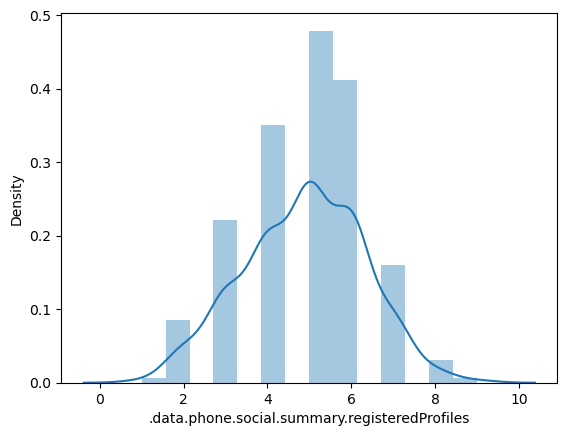

In [39]:
sns.distplot(original['.data.phone.social.summary.registeredProfiles'])

In [40]:
df = original.copy()
df

,CMD_CTR_LOAN_ID,CMD_CTR_BORROWER_ID,LOAN_ORIGINATION_LCL_AMT,LOAN_MAX_DPD_LCL_DAYS,LOAN_CREATED_AT_LCL_TS,LOAN_CODE,APPLICATION_CODE,CHANNEL_LEVEL_3_NAME,BORROWER_EMAIL_ADDRESS,BORROWER_MOBILE_PHONE_NMBR_CLEAN,BORROWER_PHONE_NMBR_CLEAN,LOAN_MAX_DPD_UNPAID_LCL_DAYS,MAX_DPD_1,dpd7_1,dpd30_1,.requestId,.data.phone.basic.phoneNumber,.data.phone.basic.phoneValid,.data.phone.basic.phoneType,.data.phone.basic.phoneDisposable,.data.phone.basic.active,.data.phone.basic.activationDate,.data.phone.basic.activeSinceXDays,.data.phone.basic.simType,.data.phone.basic.phoneNumberAge,.data.phone.basic.phoneNumberAgeDescription,.data.phone.basic.phoneTenure,.data.phone.basic.country,.data.phone.basic.originalCarrier,.data.phone.basic.ported,.data.phone.basic.portedHistory.portedDate,.data.phone.basic.portedHistory.numberOfPorts,.data.phone.basic.portedHistory.portedSinceXDays,.data.phone.basic.portedHistory.currentCarrierCircle,.data.phone.basic.portedHistory.originalCarrierCircle,.data.phone.basic.portedHistory.changeInCarrierRegion,.data.phone.basic.portedHistory.portedEvents,.data.phone.basic.currentNetwork.localRoutingNumber,.data.phone.basic.currentNetwork.mobileCountryCode,.data.phone.basic.currentNetwork.mobileNetworkCode,.data.phone.basic.currentNetwork.networkName,.data.phone.basic.currentNetwork.serviceProfileId,.data.phone.basic.numberRecycled,.data.phone.basic.lastDeactivated,.data.phone.basic.isSpam,.data.phone.basic.topUpHistory,.data.phone.basic.simSwap,.data.phone.social.summary.registeredProfiles,.data.phone.social.summary.registeredEmailProviderProfiles,.data.phone.social.summary.registeredEcommerceProfiles,.data.phone.social.summary.registeredSocialMediaProfiles,.data.phone.social.summary.registeredProfessionalProfiles,.data.phone.social.summary.registeredMessagingProfiles,.data.phone.social.summary.lastActivity,.data.phone.social.summary.numberOfNamesReturned,.data.phone.social.summary.numberOfPhotosReturned,.data.phone.social.profiles.emailProvider.google.registered,.data.phone.social.profiles.emailProvider.google.accountId,.data.phone.social.profiles.emailProvider.google.name,.data.phone.social.profiles.ecommerce.bukalapak.registered,.data.phone.social.profiles.ecommerce.amazon.registered,.data.phone.social.profiles.socialMedia.facebook.registered,.data.phone.social.profiles.socialMedia.twitter.registered,.data.phone.social.profiles.socialMedia.instagram.registered,.data.phone.social.profiles.professional.microsoft.registered,.data.phone.social.profiles.professional.linkedin.registered,.data.phone.social.profiles.messaging.telegram.registered,.data.phone.social.profiles.messaging.telegram.photo,.data.phone.social.profiles.messaging.telegram.privacyStatus,.data.phone.social.profiles.messaging.telegram.lastSeen,.data.phone.social.profiles.messaging.whatsapp.registered,.data.phone.social.profiles.messaging.whatsapp.photo,.data.phone.social.profiles.messaging.whatsapp.privacyStatus,.data.phone.social.profiles.messaging.whatsapp.lastSeen,.data.phone.social.profiles.messaging.whatsapp.about,.data.phone.social.profiles.messaging.whatsapp.businessAccount,.data.phone.social.profiles.messaging.skype.registered,.data.phone.social.profiles.messaging.skype.language,.data.phone.social.profiles.messaging.skype.id,.data.phone.social.profiles.messaging.skype.handle,.data.phone.social.profiles.messaging.skype.bio,.data.phone.social.profiles.messaging.skype.name,.data.phone.social.profiles.messaging.skype.age,.data.phone.social.profiles.messaging.skype.gender,.data.phone.social.profiles.messaging.skype.photo,.data.phone.social.profiles.messaging.skype.city,.data.phone.social.profiles.messaging.skype.state,.data.phone.social.profiles.messaging.skype.country,.data.phone.identity,.data.phone.breach,.data.email.social.summary.registeredProfiles,.data.email.social.summary.registeredConsumerElectronicsProfiles,.data.email.social.summary.registeredEmailProviderProfiles,.data.email.social.summary.registeredEcommerceProfiles,.data.email.social.summa

In [41]:
combined_df.isna().mean().reset_index().to_csv("ctos_null_values.csv", index=False)

In [42]:
combined_df['.data.phone.basic.ported'].value_counts()

.data.phone.basic.ported
0.000    464
Name: count, dtype: int64

In [43]:
df['changed'] = (df['.data.phone.basic.portedHistory.currentCarrierCircle']!=df['.data.phone.basic.portedHistory.originalCarrierCircle']).astype(int)


In [44]:
df.columns[20:100]

Index(['.data.phone.basic.active', '.data.phone.basic.activationDate', '.data.phone.basic.activeSinceXDays', '.data.phone.basic.simType', '.data.phone.basic.phoneNumberAge', '.data.phone.basic.phoneNumberAgeDescription', '.data.phone.basic.phoneTenure', '.data.phone.basic.country', '.data.phone.basic.originalCarrier', '.data.phone.basic.ported', '.data.phone.basic.portedHistory.portedDate', '.data.phone.basic.portedHistory.numberOfPorts', '.data.phone.basic.portedHistory.portedSinceXDays', '.data.phone.basic.portedHistory.currentCarrierCircle',
       '.data.phone.basic.portedHistory.originalCarrierCircle', '.data.phone.basic.portedHistory.changeInCarrierRegion', '.data.phone.basic.portedHistory.portedEvents', '.data.phone.basic.currentNetwork.localRoutingNumber', '.data.phone.basic.currentNetwork.mobileCountryCode', '.data.phone.basic.currentNetwork.mobileNetworkCode', '.data.phone.basic.currentNetwork.networkName', '.data.phone.basic.currentNetwork.serviceProfileId', '.data.phone.bas

[INFO] creating woe binning ...


/Users/venmani/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/venmani/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/venmani/anaconda3/lib/python3.11/site-packages/scorecardpy/woebin.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .stack().replace('missing', np.nan) \
/Users/venmani/anaconda3/lib/python3.11/site-packages/scorecardpy/woebin.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be r

{'.data.phone.social.summary.registeredMessagingProfiles': <Figure size 640x480 with 2 Axes>,
 '.data.phone.social.summary.registeredSocialMediaProfiles': <Figure size 640x480 with 2 Axes>,
 '.data.phone.social.summary.registeredEmailProviderProfiles': <Figure size 640x480 with 2 Axes>,
 '.data.phone.social.summary.registeredEcommerceProfiles': <Figure size 640x480 with 2 Axes>,
 '.data.phone.social.summary.registeredProfiles': <Figure size 640x480 with 2 Axes>,
 '.data.phone.social.summary.registeredProfessionalProfiles': <Figure size 640x480 with 2 Axes>}

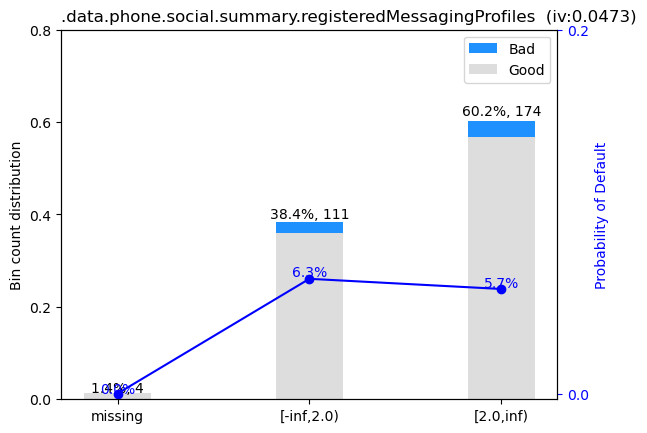

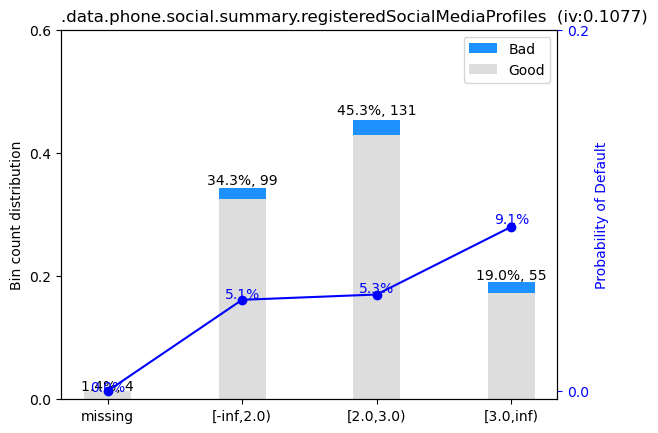

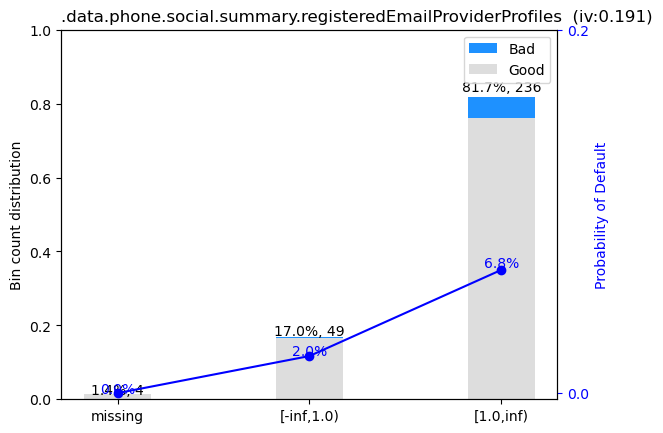

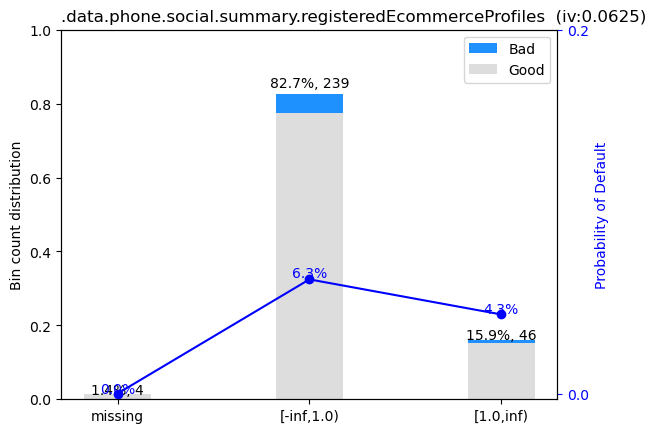

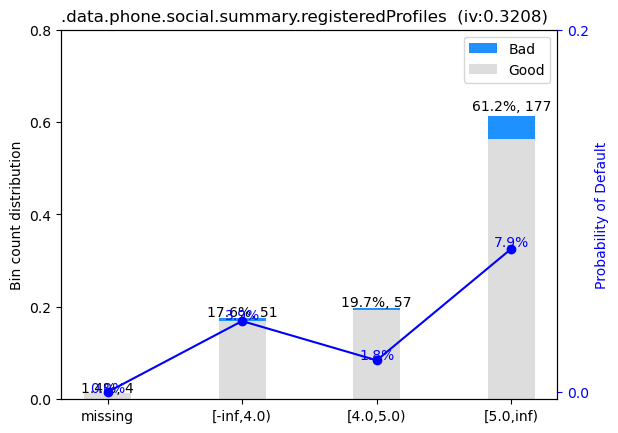

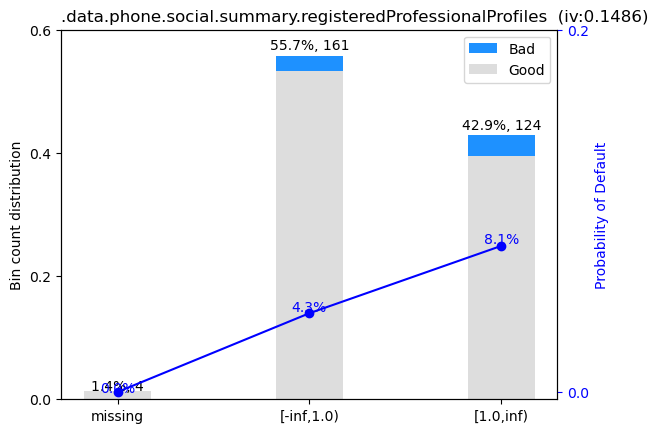

In [45]:
import scorecardpy as sc
bins = sc.woebin(df[['.data.phone.social.summary.registeredProfiles', '.data.phone.social.summary.registeredEmailProviderProfiles', '.data.phone.social.summary.registeredEcommerceProfiles', '.data.phone.social.summary.registeredSocialMediaProfiles', '.data.phone.social.summary.registeredProfessionalProfiles', '.data.phone.social.summary.registeredMessagingProfiles','dpd30_1']], 'dpd30_1', bin_num_limit=3, count_distr_limit =0.15)
sc.woebin_plot(bins)

In [46]:
df['.data.phone.social.summary.numberOfNamesReturned'].value_counts()

.data.phone.social.summary.numberOfNamesReturned
0.000    263
1.000     22
Name: count, dtype: int64

## Photos or Names Returned

[INFO] creating woe binning ...


{'.data.phone.social.summary.numberOfPhotosReturned': <Figure size 640x480 with 2 Axes>,
 '.data.phone.social.summary.numberOfNamesReturned': <Figure size 640x480 with 2 Axes>}

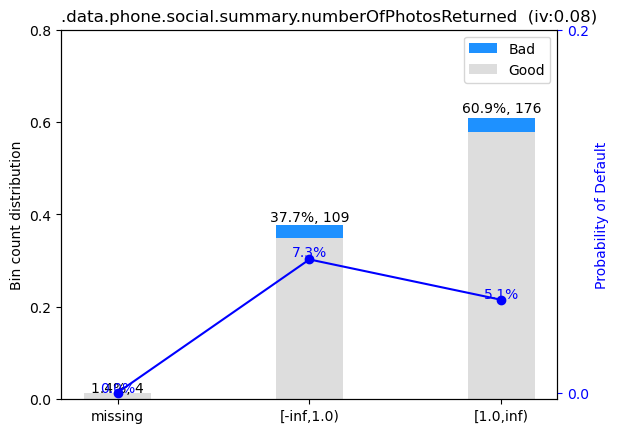

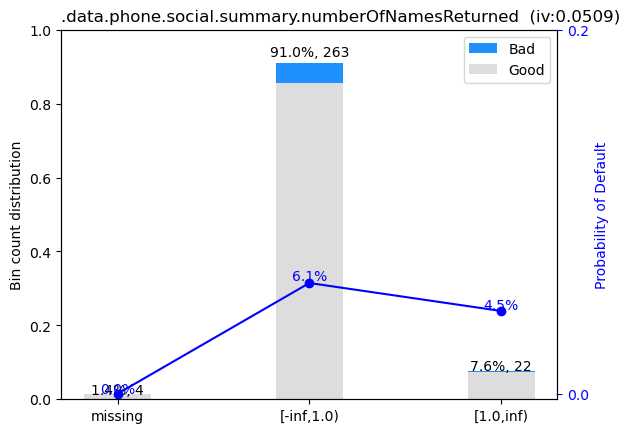

In [47]:
bins = sc.woebin(df[['.data.phone.social.summary.numberOfPhotosReturned','.data.phone.social.summary.numberOfNamesReturned','dpd30_1']], 'dpd30_1', bin_num_limit=2, count_distr_limit =0.05)
sc.woebin_plot(bins)

In [162]:
df['.data.phone.social.profiles.emailProvider.google.registered'].value_counts()

.data.phone.social.profiles.emailProvider.google.registered
True     236
False     49
Name: count, dtype: int64

## Phone Registered Profiles

In [168]:
df.columns[50:100]

Index(['.data.phone.social.summary.registeredSocialMediaProfiles', '.data.phone.social.summary.registeredProfessionalProfiles', '.data.phone.social.summary.registeredMessagingProfiles', '.data.phone.social.summary.lastActivity', '.data.phone.social.summary.numberOfNamesReturned', '.data.phone.social.summary.numberOfPhotosReturned', '.data.phone.social.profiles.emailProvider.google.registered', '.data.phone.social.profiles.emailProvider.google.accountId', '.data.phone.social.profiles.emailProvider.google.name', '.data.phone.social.profiles.ecommerce.bukalapak.registered',
       '.data.phone.social.profiles.ecommerce.amazon.registered', '.data.phone.social.profiles.socialMedia.facebook.registered', '.data.phone.social.profiles.socialMedia.twitter.registered', '.data.phone.social.profiles.socialMedia.instagram.registered', '.data.phone.social.profiles.professional.microsoft.registered', '.data.phone.social.profiles.professional.linkedin.registered', '.data.phone.social.profiles.messaging

In [179]:
df['.data.phone.social.profiles.messaging.whatsapp.businessAccount'].value_counts()

.data.phone.social.profiles.messaging.whatsapp.businessAccount
False    203
True      78
Name: count, dtype: int64

In [186]:
df['has_photo'] = (~df['.data.phone.social.profiles.messaging.whatsapp.photo'].isna()).astype(float)
df['public'] = (df['.data.phone.social.profiles.messaging.whatsapp.privacyStatus']=='PUBLIC').astype(float)
df['business_account'] = (df['.data.phone.social.profiles.messaging.whatsapp.businessAccount']==True).astype(float)

In [190]:
df['.data.identity.enrichment.persons.phoneNumber.validSince'].value_counts()

.data.identity.enrichment.persons.phoneNumber.validSince
2023-10-06T00:00:00Z    50
2021-07-22T00:00:00Z    13
2017-12-22T00:00:00Z    13
2019-10-09T00:00:00Z    12
2023-06-06T00:00:00Z     5
2023-02-09T00:00:00Z     5
2021-03-04T00:00:00Z     1
2024-02-02T00:00:00Z     1
Name: count, dtype: int64

[INFO] creating woe binning ...


{'business_account': <Figure size 640x480 with 2 Axes>}

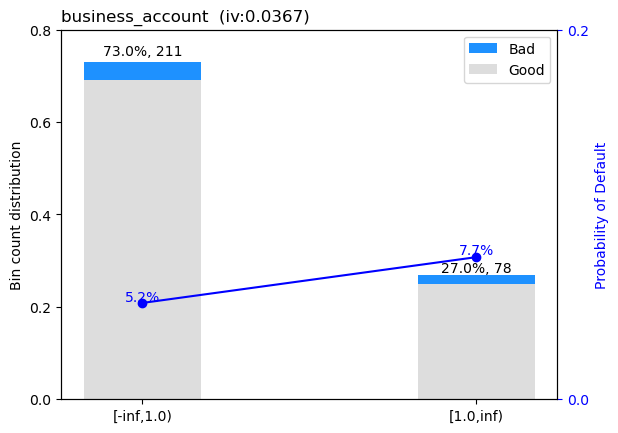

In [188]:
#df['.data.phone.social.profiles.emailProvider.google.registered'] = df['.data.phone.social.profiles.emailProvider.google.registered'].astype(float)
bins = sc.woebin(df[['business_account','dpd30_1']], 'dpd30_1', bin_num_limit=2, count_distr_limit =0.05)
sc.woebin_plot(bins)

[INFO] creating woe binning ...


{'.data.phone.social.profiles.emailProvider.google.registered': <Figure size 640x480 with 2 Axes>}

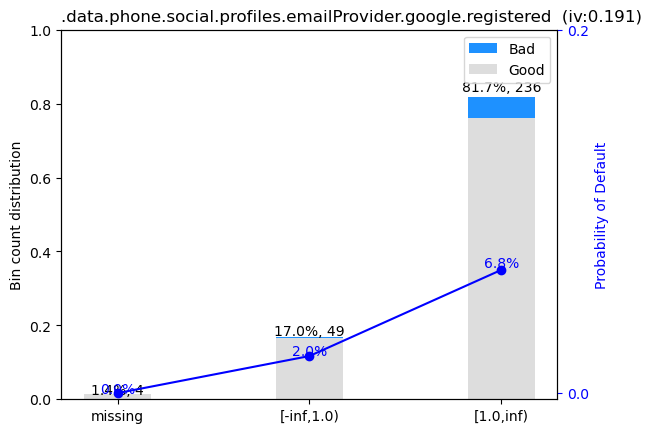

In [165]:
df['.data.phone.social.profiles.emailProvider.google.registered'] = df['.data.phone.social.profiles.emailProvider.google.registered'].astype(float)
bins = sc.woebin(df[['.data.phone.social.profiles.emailProvider.google.registered','dpd30_1']], 'dpd30_1', bin_num_limit=2, count_distr_limit =0.05)
sc.woebin_plot(bins)

[INFO] creating woe binning ...


/Users/venmani/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/venmani/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/venmani/anaconda3/lib/python3.11/site-packages/scorecardpy/woebin.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .stack().replace('missing', np.nan) \
/Users/venmani/anaconda3/lib/python3.11/site-packages/scorecardpy/woebin.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be r

{'.data.phone.social.profiles.socialMedia.facebook.registered': <Figure size 640x480 with 2 Axes>,
 '.data.phone.social.profiles.professional.microsoft.registered': <Figure size 640x480 with 2 Axes>,
 '.data.phone.social.profiles.messaging.telegram.registered': <Figure size 640x480 with 2 Axes>,
 '.data.phone.social.profiles.socialMedia.instagram.registered': <Figure size 640x480 with 2 Axes>,
 '.data.phone.social.profiles.socialMedia.twitter.registered': <Figure size 640x480 with 2 Axes>,
 '.data.phone.social.profiles.ecommerce.amazon.registered': <Figure size 640x480 with 2 Axes>}

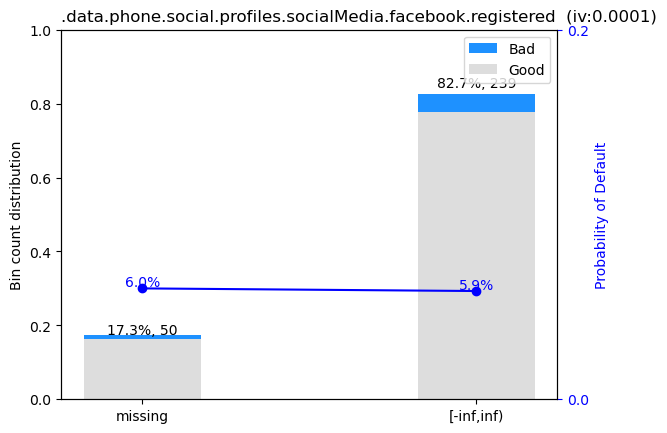

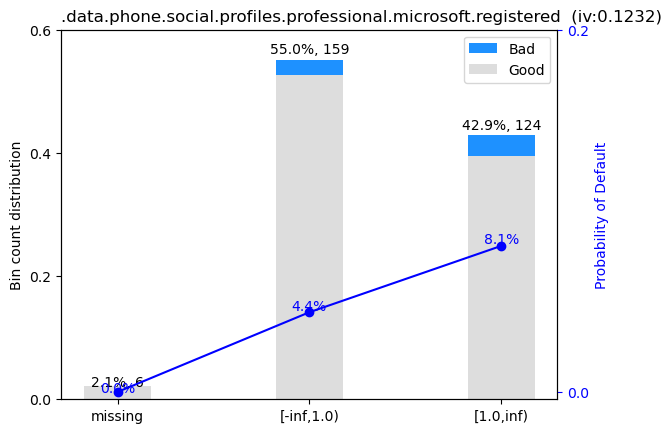

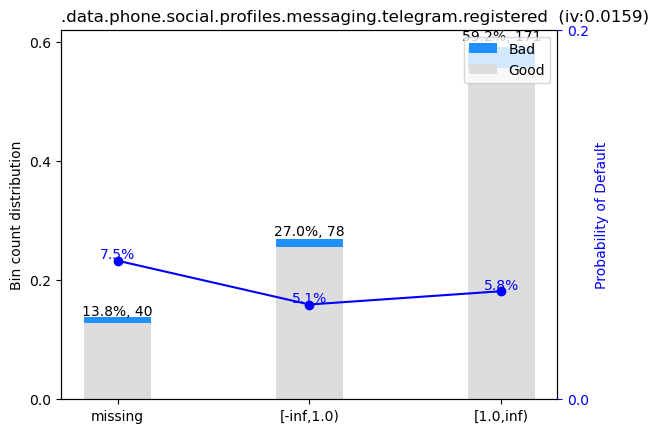

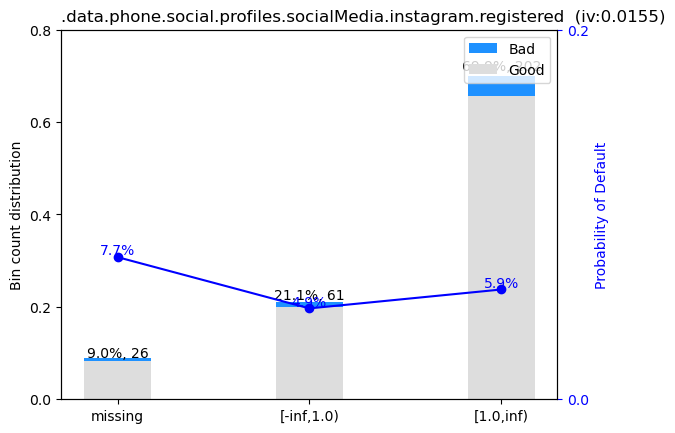

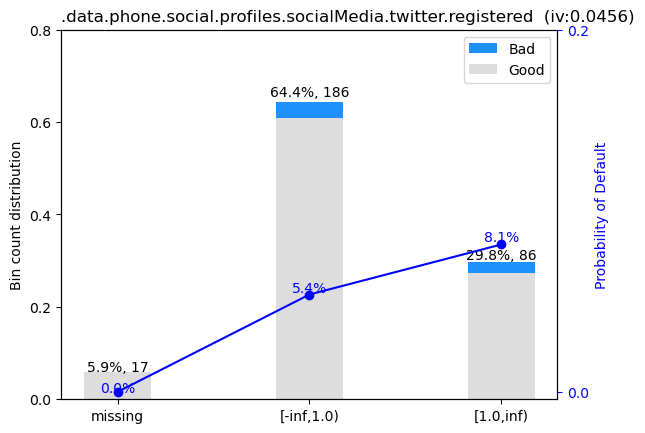

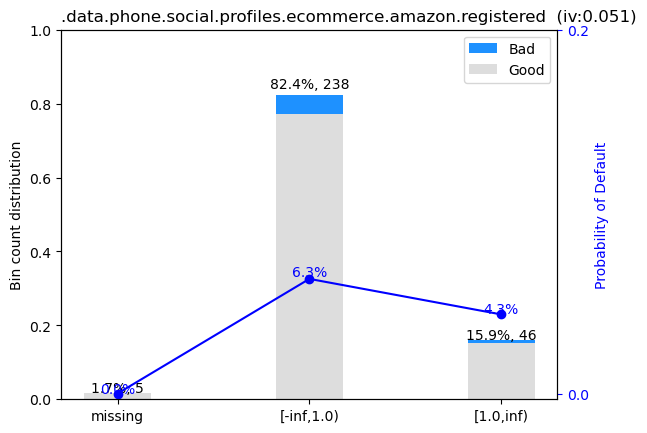

In [169]:
cols = ['.data.phone.social.profiles.ecommerce.bukalapak.registered',
       '.data.phone.social.profiles.ecommerce.amazon.registered', '.data.phone.social.profiles.socialMedia.facebook.registered', '.data.phone.social.profiles.socialMedia.twitter.registered', '.data.phone.social.profiles.socialMedia.instagram.registered', '.data.phone.social.profiles.professional.microsoft.registered', '.data.phone.social.profiles.professional.linkedin.registered', '.data.phone.social.profiles.messaging.telegram.registered']
for i in cols:
    df[i] = df[i].astype(float)
bins = sc.woebin(df[['.data.phone.social.profiles.ecommerce.bukalapak.registered',
       '.data.phone.social.profiles.ecommerce.amazon.registered', '.data.phone.social.profiles.socialMedia.facebook.registered', '.data.phone.social.profiles.socialMedia.twitter.registered', '.data.phone.social.profiles.socialMedia.instagram.registered', '.data.phone.social.profiles.professional.microsoft.registered', '.data.phone.social.profiles.professional.linkedin.registered', '.data.phone.social.profiles.messaging.telegram.registered','dpd30_1']], 'dpd30_1', bin_num_limit=2, count_distr_limit =0.05)
sc.woebin_plot(bins)

In [183]:
original = pd.read_sql("""select cmd_ctr_loan_id, cmd_ctr_borrower_id,LOAN_CODE,LOAN_ORIGINATION_LCL_AMT,
loan_max_dpd_lcl_days, loan_created_at_lcl_ts from adm.transaction.loan_denorm_t
where cmd_ctr_adjusted_product_id in (25, 195)
and loan_stage_id = 5""", con=snowflake_db)
original['ever_dpd90'] = (original['LOAN_MAX_DPD_LCL_DAYS']>=90).astype(int)
df = pd.read_sql("""select
MY_BOLT_THOR_V3.*
,FACILITY_CODE AS LOAN_FACILITY_CODE
         , LOAN_CODE
--          , IFF(QUANTUM='',0,QUANTUM)::NUMERIC AS MODEL_QUANTUM
, TO_DATE(INVOCATION_TIME, 'MM/DD/YYYY, HH24:MI:SS') as RUN_TIME
    FROM CBM.DATA_SCIENCE_MODEL_RESULTS.MY_BOLT_THOR_V3
    LEFT JOIN (select APPLICATION_CODE, FACILITY_CODE, LOAN_CODE from cdm.TRANSACTION.my_pipedrive_deals_t) DEALS
        ON MY_BOLT_THOR_V3.APPLICATION_CODE=DEALS.APPLICATION_CODE
    qualify row_number()over(partition by MY_BOLT_THOR_V3.APPLICATION_CODE order by TO_DATE(INVOCATION_TIME, 'MM/DD/YYYY, HH24:MI:SS') desc)=1""", con=snowflake_db)
df['RUN_TIME'] = pd.to_datetime(df['RUN_TIME'])
df = df[df['RUN_TIME']>='2024-07-22']
df['has_loan'] = (~df['LOAN_CODE'].isna()).astype(int)
df.groupby(['STATUS']).agg({'APPLICATION_CODE':'count','has_loan':'mean'})
act = pd.read_sql("""select loan_code, loan_max_dpd_lcl_days, loan_origination_lcl_amt
from adm.transaction.loan_denorm_t
where cmd_ctr_adjusted_product_id in (25, 195)
and loan_stage_id = 5
and loan_created_at_lcl_ts>='2024-07-01'""", con=snowflake_db)
df = df.merge(act, on='LOAN_CODE', how='left')
df['dpd7'] = (df['LOAN_MAX_DPD_LCL_DAYS']>7).astype(int)
print(sum(df['dpd7']))
df['has_loan'] = (~df['LOAN_CODE'].isna()).astype(int)

86


In [184]:
#df = df[df['RUN_TIME']<='2024-09-01']
df = df[~df['LOAN_ORIGINATION_LCL_AMT'].isna()]
df

,APPLICATION_CODE,COMPANY_TYPE,COMPANY_STATUS,LOAN_CREATED_DATE_LCL_TS,YEARS_OF_ESTABLISHMENT,CTOS_LIABILITIES,LIABILITIES_6M_CHANGES,CCRIS_OSTD_FACILITY_VALUE,CCRIS_OSTD_FACILITY_COUNT,CCRIS_APPLICATION_TOTAL_COUNT,CCRIS_FACILITY_ARREARS_1_0_,CCRIS_APPLICATION_APPROVED_COUNT,RECOURSE_COUNT,TOTAL_RECOURSE_CCRIS_APPLICATION_APPROVED_COUNT,TOTAL_RECOURSE_COUNT_CCRIS_FACILITY_ARREARS,TOTAL_RECOURSE_CCRIS_APPLICATION_COUNT,INDUSTRY_SECTOR,AVG_BANK_MONTH_END_BALANCES,BANK_LIABILITIES,BANK_CREDIT,BANK_DEBIT,DC_RATIO,BALANCE_CREDIT_RATIO,BALANCE_DEBIT_RATIO,BALANCE_LIABILITY_RATIO,BANK_CREDIT_PCT,BANK_DEBIT_PCT,BANK_END_BALANCES_PCT,BANK_LIABILITIES_PCT,DC_RATIO_PCT,BALANCE_DEBIT_RATIO_PCT,BALANCE_CREDIT_RATIO_PCT,BALANCE_LIABILITY_RATIO_PCT,BALANCE_GREATER_THAN_APPLIED_INSTALLMENT,MAX_TO_MEAN_BALANCE,MIN_TO_MEAN_BALANCE,STD_NUMBER_CREDIT,STD_MEAN_DEBIT,UNSECURED_OUTSTANDING_AS_PERCENTAGE_OF_TOTAL_LIMIT,MAX_RECOURSE_CCRIS_FACILITY_VALUE,NUMBER_OF_SECURED_FACILITIES,FOREIGN_LENDERS,TIME_SINCE_FIRST_APPLICATION,FI_COUNT_1Y,NON_FI_COUNT_L3M,DISBURSED_LOAN_COUNT,HISTORICAL_DPD,INVOCATION_TIME,STATUS,REJECTION_REASON,QUANTUM,MONTHLY_INTEREST_RATE,TOTAL_INTEREST_RATE,TENOR,PD,BANK_PD,CTOS_PD,EL,RISK_GRADE,EXPERIMENT_FLAG,ERROR_CODE,ERROR_MESSAGE,VERSION,QUANTUM_WITHOUT_CAP,RESULT_DICTIONARY,LOAN_FACILITY_CODE,LOAN_CODE,RUN_TIME,has_loan,LOAN_MAX_DPD_LCL_DAYS,LOAN_ORIGINATION_LCL_AMT,dpd7
2,APPMY0824-0588,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"09/03/2024, 01:06:55",,,,,,,,,,,,,: PR002,Failed to get the Bank statements/Ctos/industr...,Thor Camunda V3,,,None,MBIBMY-2409000012,2024-09-03,1,8.000,14300.000,1
4,APPMY0924-2130,PN,ACTIVE,"09/07/2024, 19:01:38",3,0,0,0.00,0,2,0,0,2,0,1,5,Food and beverage service activities - Restaur...,5731.744,0,15648.246,17265.212,1.1033,0.3663,0.332,,0.0737,0.0853,-0.275,,0.0108,-0.3319,-0.3247,,0.6827589914520725,3.915517872758864,0,21.568495543268657,0.1398442603787805,0,47774,1,0,236.5,3,1,0,,"09/11/2024, 01:37:08",REJECTED,PD more than 35%,17100,0.015,0.2719,18,0.3563,0.33765654473425033,0.3748927218484268,0.21378,J,NO,,,Thor Camunda V3,17100,"{'time_stamp': '09/11/2024, 01:37:08', 'disbur...",None,MBBMY-2409000029,2024-09-11,1,1.000,16500.000,0
14,APPMY0824-0715,SP,ACTIVE,"08/13/2024, 09:31:40",5,5303,0,101672.00,4,2,1,2,1,3,1,3,Construction of buildings - Construction of bu...,3904.0517,37.75,31070.6083,34844.6817,1.1215,0.1257,0.112,103.4186,0.7266,0.0744,-0.1445,,-0.3777,-0.2038,-0.5045,,0.33331541314983065,4.350163534572249,0,2.875181153713043,0.2785575002606099,75,220239,1,0,107,4,1,2,5,"08/22/2024, 07:52:19",REJECTED,PD more than 35%,15506.296980000003,0.015,0.3076,18,0.392,0.33936499770370165,0.44468096918580835,0.2352,J,NO,,,Thor Camunda V3,15506.296980000003,"{'time_stamp': '08/22/2024, 07:52:19', 'disbur...",None,MBIBMY-2408000198,2024-08-22,1,10.000,13200.000,1
17,APPMY0924-2178,SP,99999999999.0,2024-09-09T05:08:35.664039000,0,8388,0,0,0,0,0,0,1,0,1,0,food and beverage service activities - restaur...,11820.6133,0,51224.1183,51238.64,1.0003,0.2308,0.2307,,-0.0436,0.1134,-0.6249,,0.1642,-0.6631,-0.6078,,0.211945002988968,7.719609602261387,0.00760004431030509,166.81087094870847,0.4276614151811251,,594912,3,0,60,1,0,0,None,"09/13/2024, 02:08:39",REJECTED,PD more than 35%,4300,0.015,0.2724,18,0.3568,0.5118952708175366,0.20178607251517744,0.2141044029998142,J,NO,,,Thor Camunda V3,4300,"{'time_stamp': '09/13/2024, 02:08:39', 'disbur...",None,MBIBMY-2410000021,2024-09-13,1,1.000,4400.000,0
18,APPMY0824-0133,SP,ACTIVE,"08/04/2024, 00:17:10",2,157,0,0,0,0,0,0,1,0,0,1,Pre-primary and primary education,1949.564,0,26880.68,26607.322,0.9898,0.0725,0.0733,,-0.1245,-0.1442,0.1871,,-0.0225,0.3872,0.356,,0.3978280737594753,4.129140975835359,0.07465605083448931,5.770615218501403,0.22928672471959843,,13416,0,0,154,5,1,0,,"08/07/2024, 10:01:27",ACCEPTED,NONE,21900,0.015,0.2452,18,0.3282,0.2404592039782909,0.4158552759285197,0.19691999999999998,J,NO,,,Thor Camunda V3,21900,"{'time_stamp': '08/07/2024, 10:01:2

In [185]:
df = df.merge(combined_df, on='APPLICATION_CODE', how='left')
df

,APPLICATION_CODE,COMPANY_TYPE,COMPANY_STATUS,LOAN_CREATED_DATE_LCL_TS,YEARS_OF_ESTABLISHMENT,CTOS_LIABILITIES,LIABILITIES_6M_CHANGES,CCRIS_OSTD_FACILITY_VALUE,CCRIS_OSTD_FACILITY_COUNT,CCRIS_APPLICATION_TOTAL_COUNT,CCRIS_FACILITY_ARREARS_1_0_,CCRIS_APPLICATION_APPROVED_COUNT,RECOURSE_COUNT,TOTAL_RECOURSE_CCRIS_APPLICATION_APPROVED_COUNT,TOTAL_RECOURSE_COUNT_CCRIS_FACILITY_ARREARS,TOTAL_RECOURSE_CCRIS_APPLICATION_COUNT,INDUSTRY_SECTOR,AVG_BANK_MONTH_END_BALANCES,BANK_LIABILITIES,BANK_CREDIT,BANK_DEBIT,DC_RATIO,BALANCE_CREDIT_RATIO,BALANCE_DEBIT_RATIO,BALANCE_LIABILITY_RATIO,BANK_CREDIT_PCT,BANK_DEBIT_PCT,BANK_END_BALANCES_PCT,BANK_LIABILITIES_PCT,DC_RATIO_PCT,BALANCE_DEBIT_RATIO_PCT,BALANCE_CREDIT_RATIO_PCT,BALANCE_LIABILITY_RATIO_PCT,BALANCE_GREATER_THAN_APPLIED_INSTALLMENT,MAX_TO_MEAN_BALANCE,MIN_TO_MEAN_BALANCE,STD_NUMBER_CREDIT,STD_MEAN_DEBIT,UNSECURED_OUTSTANDING_AS_PERCENTAGE_OF_TOTAL_LIMIT,MAX_RECOURSE_CCRIS_FACILITY_VALUE,NUMBER_OF_SECURED_FACILITIES,FOREIGN_LENDERS,TIME_SINCE_FIRST_APPLICATION,FI_COUNT_1Y,NON_FI_COUNT_L3M,DISBURSED_LOAN_COUNT,HISTORICAL_DPD,INVOCATION_TIME,STATUS,REJECTION_REASON,QUANTUM,MONTHLY_INTEREST_RATE,TOTAL_INTEREST_RATE,TENOR,PD,BANK_PD,CTOS_PD,EL,RISK_GRADE,EXPERIMENT_FLAG,ERROR_CODE,ERROR_MESSAGE,VERSION,QUANTUM_WITHOUT_CAP,RESULT_DICTIONARY,LOAN_FACILITY_CODE,LOAN_CODE,RUN_TIME,has_loan,LOAN_MAX_DPD_LCL_DAYS,LOAN_ORIGINATION_LCL_AMT,dpd7,.requestId,.data.phone.basic.phoneNumber,.data.phone.basic.phoneValid,.data.phone.basic.phoneType,.data.phone.basic.phoneDisposable,.data.phone.basic.active,.data.phone.basic.activationDate,.data.phone.basic.activeSinceXDays,.data.phone.basic.simType,.data.phone.basic.phoneNumberAge,.data.phone.basic.phoneNumberAgeDescription,.data.phone.basic.phoneTenure,.data.phone.basic.country,.data.phone.basic.originalCarrier,.data.phone.basic.ported,.data.phone.basic.portedHistory.portedDate,.data.phone.basic.portedHistory.numberOfPorts,.data.phone.basic.portedHistory.portedSinceXDays,.data.phone.basic.portedHistory.currentCarrierCircle,.data.phone.basic.portedHistory.originalCarrierCircle,.data.phone.basic.portedHistory.changeInCarrierRegion,.data.phone.basic.portedHistory.portedEvents,.data.phone.basic.currentNetwork.localRoutingNumber,.data.phone.basic.currentNetwork.mobileCountryCode,.data.phone.basic.currentNetwork.mobileNetworkCode,.data.phone.basic.currentNetwork.networkName,.data.phone.basic.currentNetwork.serviceProfileId,.data.phone.basic.numberRecycled,.data.phone.basic.lastDeactivated,.data.phone.basic.isSpam,.data.phone.basic.topUpHistory,.data.phone.basic.simSwap,.data.phone.social.summary.registeredProfiles,.data.phone.social.summary.registeredEmailProviderProfiles,.data.phone.social.summary.registeredEcommerceProfiles,.data.phone.social.summary.registeredSocialMediaProfiles,.data.phone.social.summary.registeredProfessionalProfiles,.data.phone.social.summary.registeredMessagingProfiles,.data.phone.social.summary.lastActivity,.data.phone.social.summary.numberOfNamesReturned,.data.phone.social.summary.numberOfPhotosReturned,.data.phone.social.profiles.emailProvider.google.registered,.data.phone.social.profiles.emailProvider.google.accountId,.data.phone.social.profiles.emailProvider.google.name,.data.phone.social.profiles.ecommerce.bukalapak.registered,.data.phone.social.profiles.ecommerce.amazon.registered,.data.phone.social.profiles.socialMedia.facebook.registered,.data.phone.social.profiles.socialMedia.twitter.registered,.data.phone.social.profiles.socialMedia.instagram.registered,.data.phone.social.profiles.professional.microsoft.registered,.data.phone.social.profiles.professional.linkedin.registered,.data.phone.social.profiles.messaging.telegram.registered,.data.phone.social.profiles.messaging.telegram.photo,.data.phone.social.profiles.messaging.telegram.privacyStatus,.data.phone.social.profiles.messaging.telegram.lastSeen,.data.phone.social.profiles.messaging.whatsapp.registered,.data.phone.social.profiles.messaging.whatsapp.photo,.data.phone.social

In [186]:
df = df.dropna(subset=['.data.phone.basic.phoneNumber'])

<Axes: xlabel='.data.phone.social.summary.registeredProfiles', ylabel='Density'>

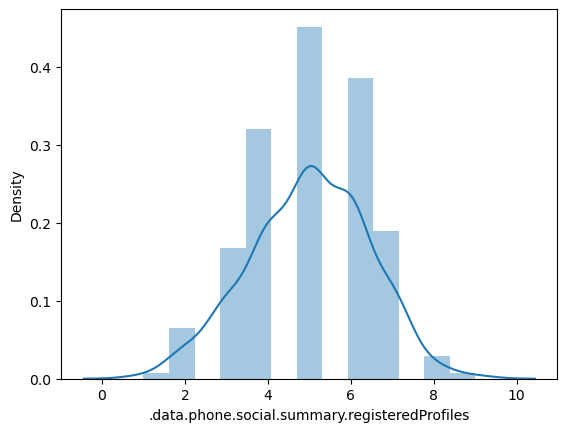

In [187]:
sns.distplot(df['.data.phone.social.summary.registeredProfiles'])

<Axes: xlabel='.data.phone.social.summary.registeredSocialMediaProfiles', ylabel='Density'>

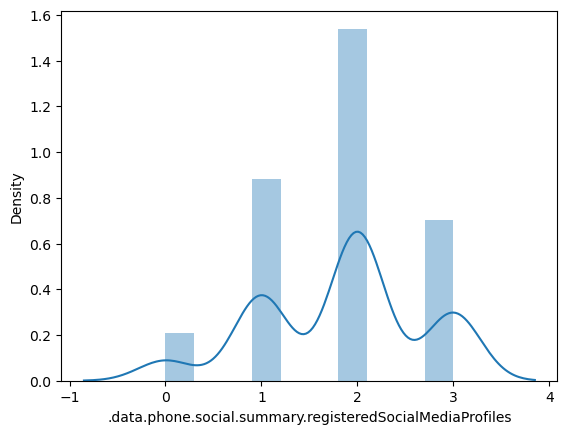

In [188]:
sns.distplot(df['.data.phone.social.summary.registeredSocialMediaProfiles'])

<Axes: xlabel='.data.phone.social.summary.registeredEcommerceProfiles', ylabel='Density'>

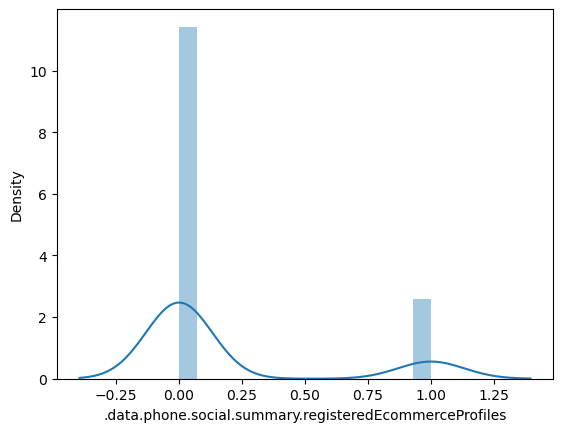

In [189]:
sns.distplot(df['.data.phone.social.summary.registeredEcommerceProfiles'])

In [190]:
df

,APPLICATION_CODE,COMPANY_TYPE,COMPANY_STATUS,LOAN_CREATED_DATE_LCL_TS,YEARS_OF_ESTABLISHMENT,CTOS_LIABILITIES,LIABILITIES_6M_CHANGES,CCRIS_OSTD_FACILITY_VALUE,CCRIS_OSTD_FACILITY_COUNT,CCRIS_APPLICATION_TOTAL_COUNT,CCRIS_FACILITY_ARREARS_1_0_,CCRIS_APPLICATION_APPROVED_COUNT,RECOURSE_COUNT,TOTAL_RECOURSE_CCRIS_APPLICATION_APPROVED_COUNT,TOTAL_RECOURSE_COUNT_CCRIS_FACILITY_ARREARS,TOTAL_RECOURSE_CCRIS_APPLICATION_COUNT,INDUSTRY_SECTOR,AVG_BANK_MONTH_END_BALANCES,BANK_LIABILITIES,BANK_CREDIT,BANK_DEBIT,DC_RATIO,BALANCE_CREDIT_RATIO,BALANCE_DEBIT_RATIO,BALANCE_LIABILITY_RATIO,BANK_CREDIT_PCT,BANK_DEBIT_PCT,BANK_END_BALANCES_PCT,BANK_LIABILITIES_PCT,DC_RATIO_PCT,BALANCE_DEBIT_RATIO_PCT,BALANCE_CREDIT_RATIO_PCT,BALANCE_LIABILITY_RATIO_PCT,BALANCE_GREATER_THAN_APPLIED_INSTALLMENT,MAX_TO_MEAN_BALANCE,MIN_TO_MEAN_BALANCE,STD_NUMBER_CREDIT,STD_MEAN_DEBIT,UNSECURED_OUTSTANDING_AS_PERCENTAGE_OF_TOTAL_LIMIT,MAX_RECOURSE_CCRIS_FACILITY_VALUE,NUMBER_OF_SECURED_FACILITIES,FOREIGN_LENDERS,TIME_SINCE_FIRST_APPLICATION,FI_COUNT_1Y,NON_FI_COUNT_L3M,DISBURSED_LOAN_COUNT,HISTORICAL_DPD,INVOCATION_TIME,STATUS,REJECTION_REASON,QUANTUM,MONTHLY_INTEREST_RATE,TOTAL_INTEREST_RATE,TENOR,PD,BANK_PD,CTOS_PD,EL,RISK_GRADE,EXPERIMENT_FLAG,ERROR_CODE,ERROR_MESSAGE,VERSION,QUANTUM_WITHOUT_CAP,RESULT_DICTIONARY,LOAN_FACILITY_CODE,LOAN_CODE,RUN_TIME,has_loan,LOAN_MAX_DPD_LCL_DAYS,LOAN_ORIGINATION_LCL_AMT,dpd7,.requestId,.data.phone.basic.phoneNumber,.data.phone.basic.phoneValid,.data.phone.basic.phoneType,.data.phone.basic.phoneDisposable,.data.phone.basic.active,.data.phone.basic.activationDate,.data.phone.basic.activeSinceXDays,.data.phone.basic.simType,.data.phone.basic.phoneNumberAge,.data.phone.basic.phoneNumberAgeDescription,.data.phone.basic.phoneTenure,.data.phone.basic.country,.data.phone.basic.originalCarrier,.data.phone.basic.ported,.data.phone.basic.portedHistory.portedDate,.data.phone.basic.portedHistory.numberOfPorts,.data.phone.basic.portedHistory.portedSinceXDays,.data.phone.basic.portedHistory.currentCarrierCircle,.data.phone.basic.portedHistory.originalCarrierCircle,.data.phone.basic.portedHistory.changeInCarrierRegion,.data.phone.basic.portedHistory.portedEvents,.data.phone.basic.currentNetwork.localRoutingNumber,.data.phone.basic.currentNetwork.mobileCountryCode,.data.phone.basic.currentNetwork.mobileNetworkCode,.data.phone.basic.currentNetwork.networkName,.data.phone.basic.currentNetwork.serviceProfileId,.data.phone.basic.numberRecycled,.data.phone.basic.lastDeactivated,.data.phone.basic.isSpam,.data.phone.basic.topUpHistory,.data.phone.basic.simSwap,.data.phone.social.summary.registeredProfiles,.data.phone.social.summary.registeredEmailProviderProfiles,.data.phone.social.summary.registeredEcommerceProfiles,.data.phone.social.summary.registeredSocialMediaProfiles,.data.phone.social.summary.registeredProfessionalProfiles,.data.phone.social.summary.registeredMessagingProfiles,.data.phone.social.summary.lastActivity,.data.phone.social.summary.numberOfNamesReturned,.data.phone.social.summary.numberOfPhotosReturned,.data.phone.social.profiles.emailProvider.google.registered,.data.phone.social.profiles.emailProvider.google.accountId,.data.phone.social.profiles.emailProvider.google.name,.data.phone.social.profiles.ecommerce.bukalapak.registered,.data.phone.social.profiles.ecommerce.amazon.registered,.data.phone.social.profiles.socialMedia.facebook.registered,.data.phone.social.profiles.socialMedia.twitter.registered,.data.phone.social.profiles.socialMedia.instagram.registered,.data.phone.social.profiles.professional.microsoft.registered,.data.phone.social.profiles.professional.linkedin.registered,.data.phone.social.profiles.messaging.telegram.registered,.data.phone.social.profiles.messaging.telegram.photo,.data.phone.social.profiles.messaging.telegram.privacyStatus,.data.phone.social.profiles.messaging.telegram.lastSeen,.data.phone.social.profiles.messaging.whatsapp.registered,.data.phone.social.profiles.messaging.whatsapp.photo,.data.phone.social

In [26]:

category_mapping = {True: 1, False: 0, None: 0}
df['whatsapp'] = df['.data.phone.social.profiles.messaging.whatsapp.registered'].astype(int)
category_mapping = {'YES': 1, 'NO': 0}
df['phone_number_active'] = df['.data.phone.basic.active'].map(category_mapping)
category_mapping = {True: 1, False: 0, None: 0}
df['email_deliverable_status'] = df['.data.email.basic.deliverable'].map(category_mapping)

ValueError: cannot convert float NaN to integer

In [27]:
df['.data.phone.social.profiles.messaging.whatsapp.registered'].value_counts()

.data.phone.social.profiles.messaging.whatsapp.registered
True     193
False      1
Name: count, dtype: int64

In [28]:
df['.data.phone.basic.active'].groupby()

.data.phone.basic.active
YES    149
NO      50
Name: count, dtype: int64

In [30]:
df.groupby(['.data.phone.basic.active']).agg({'APPLICATION_CODE':'count','dpd7':'mean'}).reset_index()

,.data.phone.basic.active,APPLICATION_CODE,dpd7
0,NO,50,0.240
1,YES,149,0.228


In [31]:
df.groupby(['.data.email.basic.deliverable']).agg({'APPLICATION_CODE':'count','dpd7':'mean'}).reset_index()

,.data.email.basic.deliverable,APPLICATION_CODE,dpd7
0,False,3,0.667
1,True,194,0.227
